# Linear Regression

#### Import libs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#### Fetch Dataset

In [5]:
data_set = fetch_california_housing()
df_x = pd.DataFrame(data_set.data)
df_y = pd.DataFrame(data_set.target)

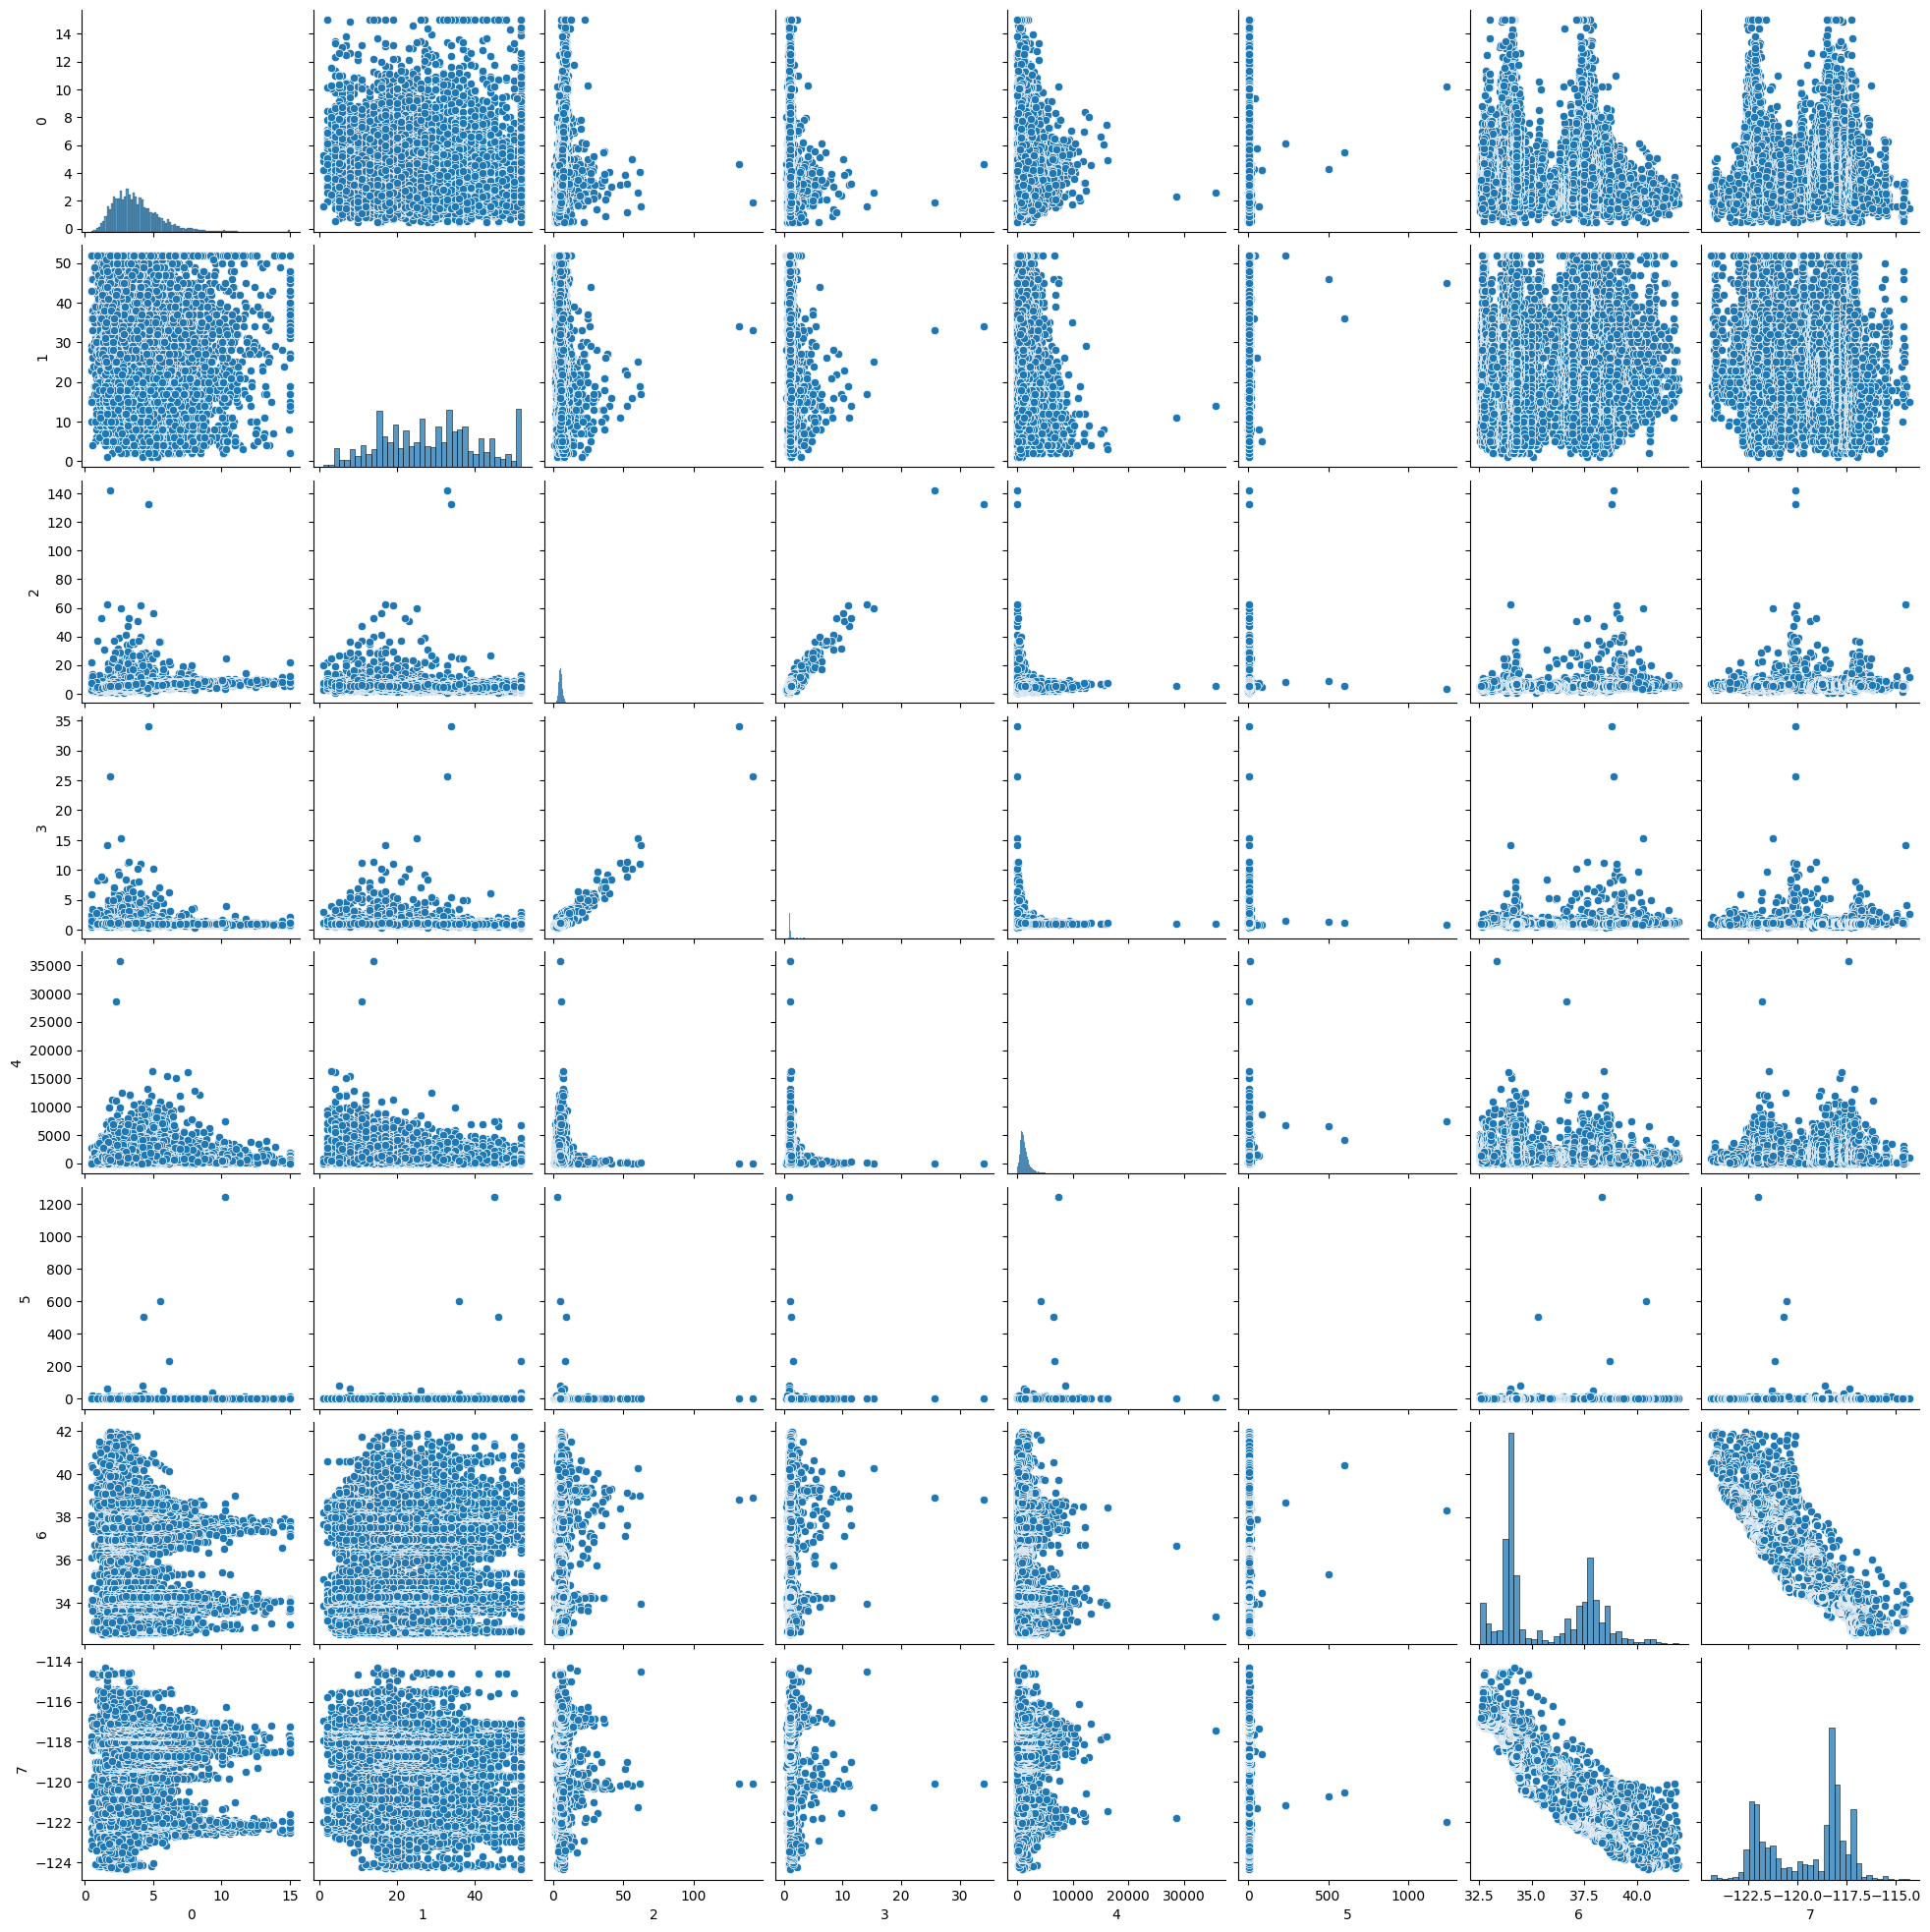

In [ ]:
sns.pairplot(df_x)

#### Plot a specific feature samples

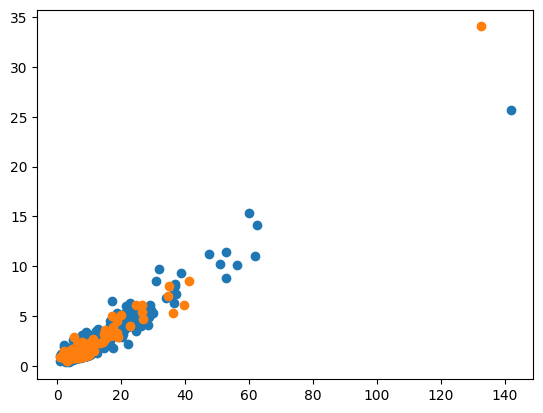

In [6]:
x = data_set.data[:,2]
y = data_set.data[:,3]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

#### Define loss function (SSE)
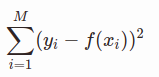
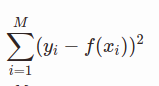
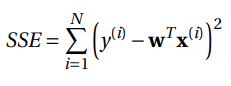

In [ ]:
def SSE( y, y_hat):
    sse = ((y - y_hat) ** 2).sum()
    return sse

#### Create and find Best weight using SSE randomly
create weights random and check it with our loss function (SSE) and find best weight.\
best weight: min SSE returned value

In [42]:
w = np.random.rand(8000,2) * np.array([20,10])
sse_arr = []
for w0 in w:
  sse_arr.append(SSE(w0,x,y))
sse_arr  = np.array(sse_arr)
best_w = w[sse_arr.argmin()]
print(best_w)

[0.52863388 0.14033304]


#### Gradient  Descent function
compute gradients formula:\
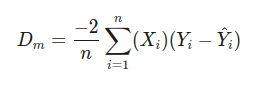
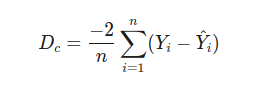\
updating weights formula:\
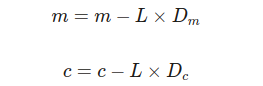

In [55]:
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    w = np.random.rand(2)
    n = len(y)  # samples count
    for epoch in range(epochs):
        y_hat = w[0] + w[1] * x

        # Compute gradients
        grad_w0 = (-2 / n) * np.sum(y - y_hat)
        grad_w1 = (-2 / n) * np.sum((y - y_hat) * x)

        # Update weights
        w[0] -= learning_rate * grad_w0
        w[1] -= learning_rate * grad_w1

    if epoch % 100 == 0:
        current_sse = SSE(y, y_hat)
        print(f"Epoch {epoch}, SSE: {current_sse:.4f}")

    return w


best_w = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

#### Draw regression line 

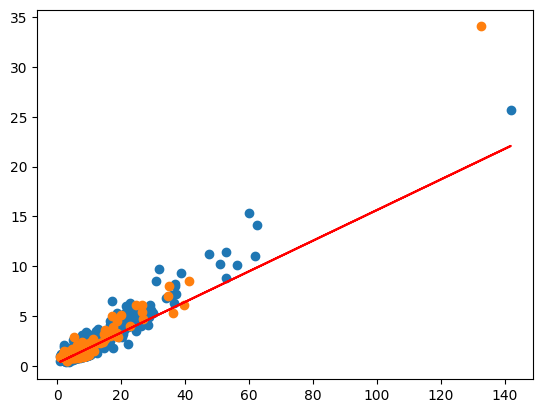

In [56]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
y_hat = best_w[0] + best_w[1] *  X_train
plt.plot(X_train, y_hat, '-r', label=f'y={best_w[0]}+{best_w[1]} *  x ')
plt.show()